<a href="https://colab.research.google.com/github/goflvhxj/MLDL_practice/blob/main/%EA%B8%B0%EC%83%81%EC%B2%AD%20%EC%BD%94%EB%93%9C%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2.1 텐서플로와 케라스**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# 텐서플로에 내장된 활성화 함수 목록 출력
print(dir(tf.keras.activations))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'deserialize', 'elu', 'exponential', 'gelu', 'get', 'hard_sigmoid', 'linear', 'relu', 'selu', 'serialize', 'sigmoid', 'softmax', 'softplus', 'softsign', 'swish', 'tanh']


In [ ]:
import numpy as np
import matplotlib.pylab as plt

# -10에서 10까지의 값을 0.1씩 증가시켜 생성
x = np.arange(-10, 10, 0.1)

# sigmoid에 위에서 생성한 값을 통과시킴
tf.keras.activations.sigmoid(x)

<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([4.53978687e-05, 5.01721647e-05, 5.54485247e-05, 6.12797396e-05,
       6.77241496e-05, 7.48462275e-05, 8.27172229e-05, 9.14158739e-05,
       1.01029194e-04, 1.11653341e-04, 1.23394576e-04, 1.36370327e-04,
       1.50710358e-04, 1.66558065e-04, 1.84071905e-04, 2.03426978e-04,
       2.24816770e-04, 2.48455082e-04, 2.74578156e-04, 3.03447030e-04,
       3.35350130e-04, 3.70606141e-04, 4.09567165e-04, 4.52622223e-04,
       5.00201107e-04, 5.52778637e-04, 6.10879359e-04, 6.75082731e-04,
       7.46028834e-04, 8.24424686e-04, 9.11051194e-04, 1.00677082e-03,
       1.11253603e-03, 1.22939862e-03, 1.35851995e-03, 1.50118226e-03,
       1.65880108e-03, 1.83293894e-03, 2.02532039e-03, 2.23784852e-03,
       2.47262316e-03, 2.73196076e-03, 3.01841632e-03, 3.33480731e-03,
       3.68423990e-03, 4.07013772e-03, 4.49627316e-03, 4.96680165e-03,
       5.48629890e-03, 6.05980149e-03, 6.69285092e-03, 7.39154134e-03,
       8.16257115e-03, 9.0132

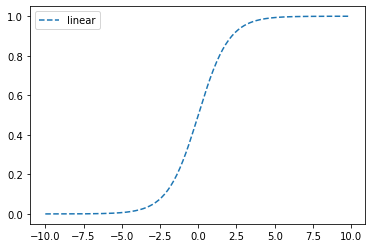

In [ ]:
# x축은 원래 값, y축은 sigmoid 함수를 통과시킨 값
plt.plot(x, tf.keras.activations.sigmoid(x), linestyle = '--', label = "linear")
plt.legend()

In [ ]:
# relu에 위에서 생성한 값 통과
tf.keras.activations.relu(x)

<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.2, 0.3,
       0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
       3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. ,

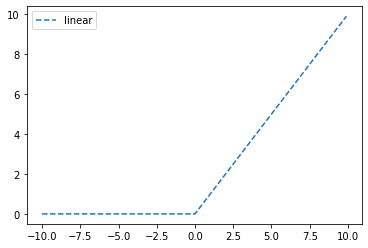

In [ ]:
# x축은 원래 값, y축은 relu 함수를 통과시킨 값
plt.plot(x, tf.keras.activations.relu(x), linestyle = '--', label = 'linear')
plt.legend()

## **2.3 모델 만들기**

In [ ]:
# 출력이 10개의 멀티클래스를 분류하며 활성화 함수인 activaton을 softmax로 설정 시 출력값이 비율로 반환

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # 입력층
    tf.keras.layers.Dense(128, activation = 'relu'), # 은닉층
    tf.keras.layers.Dense(10, activation = 'softmax') # 출력층
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## **3.1 옵티마이저**

In [ ]:
# 텐서플로에 내장된 옵티마이저 목록 출력
print(dir(tf.keras.optimizers))

['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'Optimizer', 'RMSprop', 'SGD', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'deserialize', 'experimental', 'get', 'legacy', 'schedules', 'serialize']


In [ ]:
# 손실 함수의 기울기에 따라 학습률을 조절하며 관성을 이용해 지역 최솟값에 갇히지 않고 전체 최솟값을 찾음
# 아담은 RMSProp + 모멘텀 으로 대체적으로 좋은 성능을 내는 옵티마이저
tf.keras.optimizers.Adam(
    learning_rate = 0.001,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    amsgrad = False,
    name = 'Adam'
)

## **3.2 모델 컴파일**

In [ ]:
# loss는 손실 함수(Loss function)로 훈련 하는 동안 모델의 오차 측정
# 예측할 값이 멀티클래스(에측할 값의 종류가 2개 이상) 일 때는 출력해야하는 값에 따라
# categorical crossentropy : one-hot형태의 클래스([0,1,0,0])일 때 사용
# sparse categorical crossentropy : 정답값이 0, 1, 2, 3, 4의 형태일 때 사용
# 예측할 값의 종류가 둘 중 하나일 때(바이너리) binary_crossentropy 사용

model.compile(optimizer = 'adam',
              loss = 'sparse categorical crossentropy',
              metrics = ['accuracy'])

## **3.3 Dropout**

In [ ]:
# 0.2로 설정하면 전체 노드 중 20%는 임의로 제외하고 사용한다는 의미

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## **4.1 파일 경로와 목록**

In [ ]:
image_path = '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset'
image_path

'/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset'

### **os.walk**

In [ ]:
# image_path에 있는 new_dataset 경로를 root로 하위 디렉토리를 dirs로 해당 경로에 있는 모든 파일을 files로 볼 수 있음

import os
for dirpath, dirnames, filenames in os.walk(f'{image_path}'):
  print(dirpath, dirnames)

/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset ['L2_10', 'L2_12', 'L2_15', 'L2_20', 'L2_21', 'L2_24', 'L2_25', 'L2_27', 'L2_3', 'L2_30', 'L2_33', 'L2_34', 'L2_39', 'L2_40', 'L2_41', 'L2_44', 'L2_45', 'L2_46', 'L2_50', 'L2_52']
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_12 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_15 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_20 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_21 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_24 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_25 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_27 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_3 []
/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_

### **glob**

In [ ]:
# glob는 패턴(유닉스 셸이 사용하는 규칙)을 사용하여 파일을 검색하는 모듈
# 현재 디렉토리와 하위 디렉토리의 모든 파일을 찾아서 출력

import glob
img_paths = glob.glob(f'{image_path}/*/*.jpg')
img_paths

['/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1801.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1802.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1804.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1803.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1805.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1806.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1807.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1808.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1809.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1810.jpg',
 '/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10

In [ ]:
image_files = []
for filename in img_paths:
  image_files.append(filename)

In [ ]:
image_files[6000]

'/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_25/L2_25_6099.jpg'

## **4.2 RGB 색상**


### **이미지 데이터의 RGB값 이해**

In [ ]:
# matplotlib의 imread 기능을 사용하면 이미지를 배열형태로 가져올 수 있음
# 픽셀 별 RGB 값으로 나타남

import matplotlib.pyplot as plt

img = plt.imread(f'{image_path}/L2_10/L2_10_10.jpg')
print(img.shape)
img

(150, 150, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(-0.5, 149.5, 149.5, -0.5)

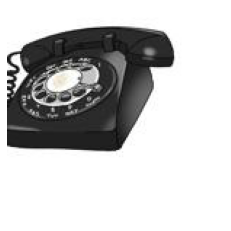

In [ ]:
plt.imshow(img)
plt.axis('off')

In [ ]:
# R 배열
img[:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
# G 배열
img[:,:,1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
# B 배열
img[:,:,2]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## **4.3 이미지 처리 도구**

In [ ]:
img_L2_10 = f'{image_path}/L2_10/L2_10_10.jpg'
img_L2_10

'/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_10.jpg'

### **PIL(Pillow)**

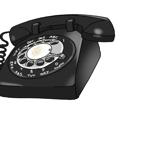

In [ ]:
# PIL을 통해 이미지 불러올 때 PIL.Image.open 사용
from PIL import Image, ImageFilter

original = Image.open(img_L2_10)
original

In [ ]:
# 이미지 사이즈 확인
img_size = original.size
img_size

(150, 150)

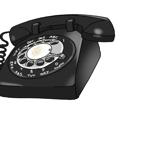

In [ ]:
# 이미지 사이즈 변경
original.resize((150,150))

In [ ]:
# 이미지 저장
original.save("original.png")

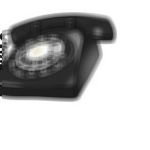

In [ ]:
# BLUR 필터를 적용하여 흐리게
original.filter(ImageFilter.BLUR)

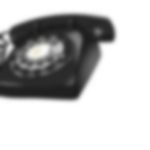

In [ ]:
# GaussianBlur 필터를 적용하여 흐리게
original.filter(ImageFilter.GaussianBlur)

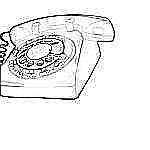

In [ ]:
# CONTOUR로 행렬의 등고선 추출
original.filter(ImageFilter.CONTOUR)

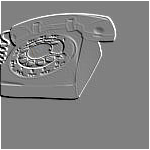

In [ ]:
# EMBOSS 효과 적용
original.filter(ImageFilter.EMBOSS)

### **OpenCV**

In [ ]:
img_path = image_files[0]
img_path

'/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/new_dataset/L2_10/L2_10_1801.jpg'

In [ ]:
# OpenCV는 RGB 형태가 아닌 BGR 형태를 사용하기 때문에 COLOR_BGR2RGB를 통해 RGB 형태로 변환
# imread를 통해 이미지 불러오면 배열형태가 됨

import cv2

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(150, 150, 3)

In [ ]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(-0.5, 149.5, 149.5, -0.5)

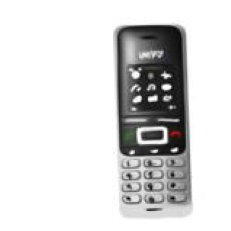

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.axis('off')

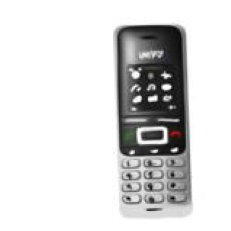

In [ ]:
# 이미지 크기를 150 * 150 픽셀로 크기 변경
image_150x150 = cv2.resize(img, (150, 150))
plt.imshow(image_150x150, cmap = 'gray')
plt.axis('off')
plt.show()

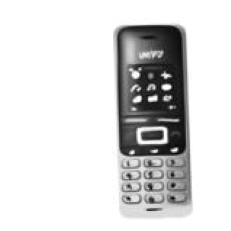

In [ ]:
# IMREAD_GRAYSCALE을 통해 흑백 이미지로 변환
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.show()

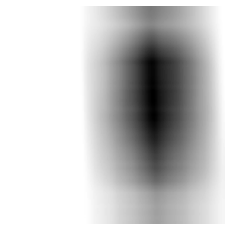

In [ ]:
# 각 픽셀 주변의 50X50커널 평균값으로 이미지를 흐리게 만듦
image_blurry = cv2.blur(image, (50,50))
plt.imshow(image_blurry, cmap = 'gray')
plt.axis('off')
plt.show()

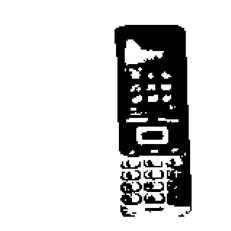

In [ ]:
# 적응적 임계처리를 적용. 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image, max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2. THRESH_BINARY,
                                        neighborhood_size, subtract_from_mean)
plt.imshow(image_binarized, cmap = 'gray')
plt.axis('off')
plt.show()

## **5.2 합성곱 층**

In [ ]:
# 텐서플로의 케라스 모델을 사용하여 합성곱 신경망 모델 구성
# Sequential 모델을 먼저 만든 뒤 순서대로 연결된 층을 구성
# 합성곱층을 Conv2D로 구현
# 이 때, 필터 갯수, 커널사이즈, 스트라이드, 패딩 값 정의
# 패딩을 same으로 지정 시 입력과 출력의 크기가 같게 함
# 그리고 합성곱 층 하나 더 구현, 이때는 패딩을 valid로 설정해 패딩을 하지 않음
# 그러면 두 번째 층에서 입력보다 출력의 크기가 줄어듦

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same',
                 input_shape = (150, 150, 3)))
print(model.output_shape)
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid'))
print(model.output_shape)

(None, 150, 150, 32)
(None, 148, 148, 32)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


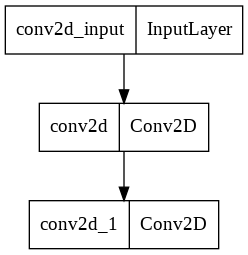

In [ ]:
plot_model(model)

## **5.3 풀링층**

In [ ]:
# 합성곱 층을 거친 층의 사이즈를 줄여주기 위해 SubSampling을 진행
# 이 과정을 통해 데이터의 사이즈를 줄여주기 때문에 빠르게 학습을 할 수 있음
# 합성곱층인 Conv2D층 아래에 MaxPooling2D를 통해 풀링과정 거치도록 모델 변경
# 그 후 Flatten을 통해 1차원 배열로 완전 연결 네트워크를 구성
# Dense를 통해 은닉층을 생성 후 20가지로 분류할 수 있도록 출력을 20으로 설정 후 비율로 반환 되도록 활성화 함수로 softmax 사용

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same',
                 input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'valid'))
model.add(MaxPooling2D(2,2))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(256, activation = 'relu'))
model.add(Dense(20, activation = 'softmax'))

(None, 36, 36, 32)
(None, 41472)


In [ ]:
# 합성곱과 풀링 연산을 진행하면 전체 데이터 사이즈가 줄어 연산에 들어가는 컴퓨팅 리소스가 줄어드는 장점
# 데이터의 크기를 줄이며 소실이 발생하기 때문에 오버피팅을 방지함

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 73, 73, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dense_4 (Dense)             (None, 256)              

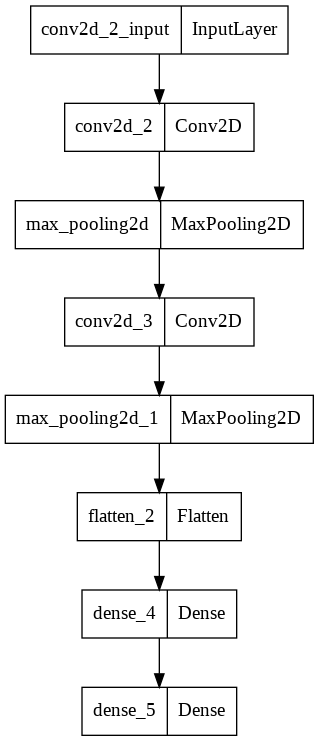

In [ ]:
plot_model(model)

## **6.1 합성곱 층을 통한 학습**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import tqdm as tqdm

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 이미지 폴더 train / val / test 폴더로 분리
#import splitfolders

#splitfolders.ratio('/content/drive/MyDrive/2022 DataCreatorCamp_나 is NICE/대학부 데이터셋', output = '/content/drive/MyDrive/dataset_sizefree',
                   seed = 1337, ratio = (.8, .1, .1), group_prefix = None, move = False)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  4.54 files/s]
Copying files: 2 files [00:00,  3.06 files/s]
Copying files: 3 files [00:01,  2.78 files/s]
Copying files: 4 files [00:01,  2.79 files/s]
Copying files: 5 files [00:01,  2.49 files/s]

KeyboardInterrupt: ignored

In [ ]:
# train/val/test 라벨별 경로 저장
PATH = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(PATH, 'train')
val_dir = os.path.join(PATH, 'val')
test_dir = os.path.join(PATH, 'test')

train_3_dir = os.path.join(train_dir, 'L2_3')
train_10_dir = os.path.join(train_dir, 'L2_10')
train_12_dir = os.path.join(train_dir, 'L2_12')
train_15_dir = os.path.join(train_dir, 'L2_15')
train_20_dir = os.path.join(train_dir, 'L2_20')
train_21_dir = os.path.join(train_dir, 'L2_21')
train_24_dir = os.path.join(train_dir, 'L2_24')
train_25_dir = os.path.join(train_dir, 'L2_25')
train_27_dir = os.path.join(train_dir, 'L2_27')
train_30_dir = os.path.join(train_dir, 'L2_30')
train_33_dir = os.path.join(train_dir, 'L2_33')
train_34_dir = os.path.join(train_dir, 'L2_34')
train_39_dir = os.path.join(train_dir, 'L2_39')
train_40_dir = os.path.join(train_dir, 'L2_40')
train_41_dir = os.path.join(train_dir, 'L2_41')
train_44_dir = os.path.join(train_dir, 'L2_44')
train_45_dir = os.path.join(train_dir, 'L2_45')
train_46_dir = os.path.join(train_dir, 'L2_46')
train_50_dir = os.path.join(train_dir, 'L2_50')
train_52_dir = os.path.join(train_dir, 'L2_52')

val_3_dir = os.path.join(val_dir, 'L2_3')
val_10_dir = os.path.join(val_dir, 'L2_10')
val_12_dir = os.path.join(val_dir, 'L2_12')
val_15_dir = os.path.join(val_dir, 'L2_15')
val_20_dir = os.path.join(val_dir, 'L2_20')
val_21_dir = os.path.join(val_dir, 'L2_21')
val_24_dir = os.path.join(val_dir, 'L2_24')
val_25_dir = os.path.join(val_dir, 'L2_25')
val_27_dir = os.path.join(val_dir, 'L2_27')
val_30_dir = os.path.join(val_dir, 'L2_30')
val_33_dir = os.path.join(val_dir, 'L2_33')
val_34_dir = os.path.join(val_dir, 'L2_34')
val_39_dir = os.path.join(val_dir, 'L2_39')
val_40_dir = os.path.join(val_dir, 'L2_40')
val_41_dir = os.path.join(val_dir, 'L2_41')
val_44_dir = os.path.join(val_dir, 'L2_44')
val_45_dir = os.path.join(val_dir, 'L2_45')
val_46_dir = os.path.join(val_dir, 'L2_46')
val_50_dir = os.path.join(val_dir, 'L2_50')
val_52_dir = os.path.join(val_dir, 'L2_52')

test_3_dir = os.path.join(test_dir, 'L2_3')
test_10_dir = os.path.join(test_dir, 'L2_10')
test_12_dir = os.path.join(test_dir, 'L2_12')
test_15_dir = os.path.join(test_dir, 'L2_15')
test_20_dir = os.path.join(test_dir, 'L2_20')
test_21_dir = os.path.join(test_dir, 'L2_21')
test_24_dir = os.path.join(test_dir, 'L2_24')
test_25_dir = os.path.join(test_dir, 'L2_25')
test_27_dir = os.path.join(test_dir, 'L2_27')
test_30_dir = os.path.join(test_dir, 'L2_30')
test_33_dir = os.path.join(test_dir, 'L2_33')
test_34_dir = os.path.join(test_dir, 'L2_34')
test_39_dir = os.path.join(test_dir, 'L2_39')
test_40_dir = os.path.join(test_dir, 'L2_40')
test_41_dir = os.path.join(test_dir, 'L2_41')
test_44_dir = os.path.join(test_dir, 'L2_44')
test_45_dir = os.path.join(test_dir, 'L2_45')
test_46_dir = os.path.join(test_dir, 'L2_46')
test_50_dir = os.path.join(test_dir, 'L2_50')
test_52_dir = os.path.join(test_dir, 'L2_52')

In [ ]:
# 폴더별 개수 출력
num_3_tr = len(os.listdir(train_3_dir))
num_10_tr = len(os.listdir(train_10_dir))
num_12_tr = len(os.listdir(train_12_dir))
num_15_tr = len(os.listdir(train_15_dir))
num_20_tr = len(os.listdir(train_20_dir))
num_21_tr = len(os.listdir(train_21_dir))
num_24_tr = len(os.listdir(train_24_dir))
num_25_tr = len(os.listdir(train_25_dir))
num_27_tr = len(os.listdir(train_27_dir))
num_30_tr = len(os.listdir(train_30_dir))
num_33_tr = len(os.listdir(train_33_dir))
num_34_tr = len(os.listdir(train_34_dir))
num_39_tr = len(os.listdir(train_39_dir))
num_40_tr = len(os.listdir(train_40_dir))
num_41_tr = len(os.listdir(train_41_dir))
num_44_tr = len(os.listdir(train_44_dir))
num_45_tr = len(os.listdir(train_45_dir))
num_46_tr = len(os.listdir(train_46_dir))
num_50_tr = len(os.listdir(train_50_dir))
num_52_tr = len(os.listdir(train_52_dir))

num_3_val = len(os.listdir(val_3_dir))
num_10_val = len(os.listdir(val_10_dir))
num_12_val = len(os.listdir(val_12_dir))
num_15_val = len(os.listdir(val_15_dir))
num_20_val = len(os.listdir(val_20_dir))
num_21_val = len(os.listdir(val_21_dir))
num_24_val = len(os.listdir(val_24_dir))
num_25_val = len(os.listdir(val_25_dir))
num_27_val = len(os.listdir(val_27_dir))
num_30_val = len(os.listdir(val_30_dir))
num_33_val = len(os.listdir(val_33_dir))
num_34_val = len(os.listdir(val_34_dir))
num_39_val = len(os.listdir(val_39_dir))
num_40_val = len(os.listdir(val_40_dir))
num_41_val = len(os.listdir(val_41_dir))
num_44_val = len(os.listdir(val_44_dir))
num_45_val = len(os.listdir(val_45_dir))
num_46_val = len(os.listdir(val_46_dir))
num_50_val = len(os.listdir(val_50_dir))
num_52_val = len(os.listdir(val_52_dir))

total_train = num_3_tr + num_10_tr + num_12_tr + num_15_tr + num_20_tr + num_21_tr + num_24_tr + num_25_tr + num_27_tr + num_30_tr + num_33_tr + num_34_tr + num_39_tr + num_40_tr + num_41_tr + num_44_tr + num_45_tr + num_46_tr + num_50_tr + num_52_tr
total_val = num_3_val + num_10_val + num_12_val + num_15_val + num_20_val + num_21_val + num_24_val + num_25_val + num_27_val + num_30_val + num_33_val + num_34_val + num_39_val + num_40_val + num_41_val + num_44_val + num_45_val + num_46_val + num_50_val + num_52_val              

In [ ]:
print('total training L2_3 images:', num_3_tr)
print('total training L2_10 images:', num_10_tr)
print('total training L2_12 images:', num_12_tr)
print('total training L2_15 images:', num_15_tr)
print('total training L2_20 images:', num_20_tr)
print('total training L2_21 images:', num_21_tr)
print('total training L2_24 images:', num_24_tr)
print('total training L2_25 images:', num_25_tr)
print('total training L2_27 images:', num_27_tr)
print('total training L2_30 images:', num_30_tr)
print('total training L2_33 images:', num_33_tr)
print('total training L2_34 images:', num_34_tr)
print('total training L2_39 images:', num_39_tr)
print('total training L2_40 images:', num_40_tr)
print('total training L2_41 images:', num_41_tr)
print('total training L2_44 images:', num_44_tr)
print('total training L2_45 images:', num_45_tr)
print('total training L2_46 images:', num_46_tr)
print('total training L2_50 images:', num_50_tr)
print('total training L2_52 images:', num_52_tr)

print('-----------------------------------------')

print('total val L2_3 images:', num_3_val)
print('total val L2_10 images:', num_10_val)
print('total val L2_12 images:', num_12_val)
print('total val L2_15 images:', num_15_val)
print('total val L2_20 images:', num_20_val)
print('total val L2_21 images:', num_21_val)
print('total val L2_24 images:', num_24_val)
print('total val L2_25 images:', num_25_val)
print('total val L2_27 images:', num_27_val)
print('total val L2_30 images:', num_30_val)
print('total val L2_33 images:', num_33_val)
print('total val L2_34 images:', num_34_val)
print('total val L2_39 images:', num_39_val)
print('total val L2_40 images:', num_40_val)
print('total val L2_41 images:', num_41_val)
print('total val L2_44 images:', num_44_val)
print('total val L2_45 images:', num_45_val)
print('total val L2_46 images:', num_46_val)
print('total val L2_50 images:', num_50_val)
print('total val L2_52 images:', num_52_val)

print('-----------------------------------------')
print('Total Training images:', total_train)
print('Total Validation images:', total_val)

total training L2_3 images: 476
total training L2_10 images: 1514
total training L2_12 images: 414
total training L2_15 images: 1207
total training L2_20 images: 328
total training L2_21 images: 328
total training L2_24 images: 625
total training L2_25 images: 4951
total training L2_27 images: 340
total training L2_30 images: 291
total training L2_33 images: 4964
total training L2_34 images: 335
total training L2_39 images: 363
total training L2_40 images: 144
total training L2_41 images: 474
total training L2_44 images: 437
total training L2_45 images: 504
total training L2_46 images: 1771
total training L2_50 images: 624
total training L2_52 images: 305
-----------------------------------------
total val L2_3 images: 59
total val L2_10 images: 189
total val L2_12 images: 51
total val L2_15 images: 150
total val L2_20 images: 41
total val L2_21 images: 41
total val L2_24 images: 78
total val L2_25 images: 618
total val L2_27 images: 42
total val L2_30 images: 36
total val L2_33 images

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# 디스크에서 이미지를 읽고 적절한 tensor로 사전 처리, tensor의 배치로 변환
from keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale = 1./255)
val_image_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
# 이미지를 배치단위로 불러올 generator
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'categorical')

val_data_gen = val_image_generator.flow_from_directory(batch_size = batch_size,
                                                       directory = val_dir,
                                                       target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode = 'categorical')

Found 20395 images belonging to 20 classes.
Found 2542 images belonging to 20 classes.


In [ ]:
# next 함수는 데이터셋의 배치 반환
# next 함수의 반환 값은 (x_train, y_train) 이때, x_train은 학습 특징, y_train은 라벨

sample_training_images, label = next(train_data_gen)

In [ ]:
def plotImages(images_arr, label):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('on')
  plt.tight_layout()
  plt.show()
  print(label)

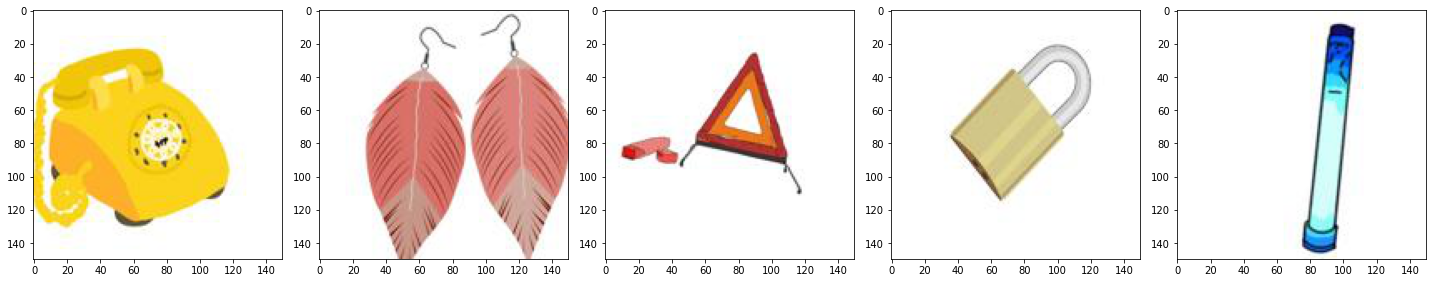

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
plotImages(sample_training_images[:5], label[:5])

In [ ]:
# 모델 생성1

model = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu',
           input_shape =  (IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(20)
])

In [ ]:
# 모델 생성2
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'valid'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation = 'softmax'))

In [ ]:
# 모델 생성3
# 배치 정규화를 사용하면 그라디언트 소실 문제가 크게 감소하여 수렴성을 가진 활성화 함수를 사용할 수 있음
# 가중치 초기화에 네트워크가 훨씬 덜 민감해짐

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model3 = Sequential()
model3.add(Conv2D(32, (3,3), strides = 1, padding = 'same', input_shape = (150, 150, 3)))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())

model3.add(Conv2D(32, (3,3), strides = 1, padding = 'valid'))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())

model3.add(Conv2D(64, (3,3)))
model3.add(MaxPooling2D(2,2))
model3.add(BatchNormalization())

model3.add(Flatten())
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(20, activation = 'softmax'))

In [ ]:
model3.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 75, 75, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 73, 73, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                      

In [ ]:
# 모델2 학습
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
159/159 [==============================] - 46s 283ms/step - loss: 2.4315 - accuracy: 0.2786 - val_loss: 2.1695 - val_accuracy: 0.3516
Epoch 2/15
159/159 [==============================] - 45s 281ms/step - loss: 2.0805 - accuracy: 0.3844 - val_loss: 1.8627 - val_accuracy: 0.4572
Epoch 3/15
159/159 [==============================] - 45s 282ms/step - loss: 1.8773 - accuracy: 0.4411 - val_loss: 1.7048 - val_accuracy: 0.4901
Epoch 4/15
159/159 [==============================] - 45s 282ms/step - loss: 1.7005 - accuracy: 0.4909 - val_loss: 1.6240 - val_accuracy: 0.5230
Epoch 5/15
159/159 [==============================] - 45s 281ms/step - loss: 1.5220 - accuracy: 0.5357 - val_loss: 1.4567 - val_accuracy: 0.5658
Epoch 6/15
159/159 [==============================] - 45s 285ms/step - loss: 1.3449 - accuracy: 0.5826 - val_loss: 1.3711 - val_accuracy: 0.5929
Epoch 7/15
159/159 [==============================] - 45s 285ms/step - loss: 1.1610 - accuracy: 0.6347 - val_loss: 1.3242 - val_ac

In [ ]:
# 모델3 학습
history = model3.fit_generator(
    train_data_gen,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
 22/159 [===>..........................] - ETA: 42:08 - loss: 2.6923 - accuracy: 0.3033

KeyboardInterrupt: ignored

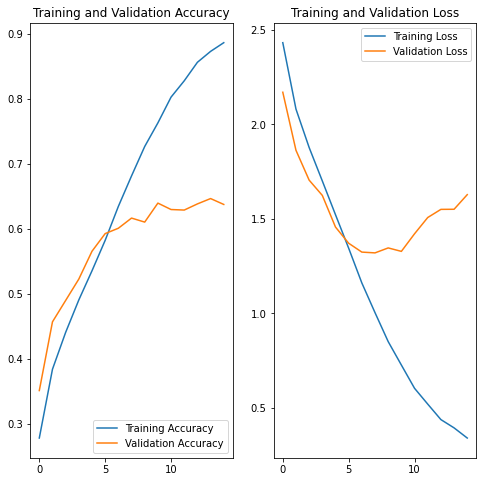

In [ ]:
# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()